In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path="ex1data1.txt"
data = pd.read_csv(path,header=None,names=["Population","Profit"])

In [3]:
data.head()

Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233

In [4]:
data.describe()

Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000

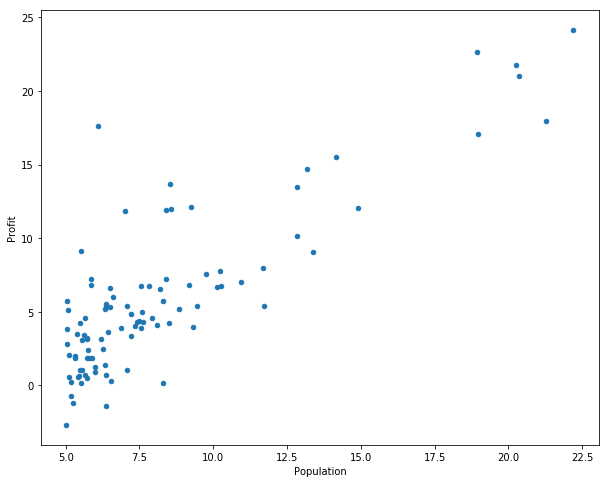

In [5]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(10,8))
plt.show()

In [6]:
cols=data.shape[1]#shapeÔºåËé∑ÂèñÁ¨¨‰∏ÄË°åÁöÑ‰∏™Êï∞
x=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]
#ËØïËØï‰∏çÂä†Ones‰∏ÄÂàó
#‰∏çÂä†OnesÔºåÂ∞±ÊòØËÆæÁΩÆÁöÑb‰∏∫0

In [7]:
x.head()

Population
0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598

In [8]:
y.head()

Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233

In [9]:
theta = np.matrix(np.array([0]))#‰∏çÂä†ONesÔºåthetaÂ∫îËØ•‰∏∫1Ôºå1
x=np.matrix(x.values)
y=np.matrix(y.values)

In [10]:
theta

matrix([[0]])

In [11]:
x.shape,y.shape,theta.shape

((97, 1), (97, 1), (1, 1))

È¶ñÂÖàÔºåÊàë‰ª¨Â∞ÜÂàõÂª∫‰∏Ä‰∏™‰ª•ÂèÇÊï∞Œ∏‰∏∫ÁâπÂæÅÂáΩÊï∞ÁöÑ‰ª£‰ª∑ÂáΩÊï∞
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
ÂÖ∂‰∏≠Ôºö\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [12]:
def computerCost(x,y,theta):
    temp=np.power(((x*theta.T)-y),2)#Áü©ÈòµÁöÑ‰πòÊ≥ï
    return np.sum(temp)/(2*len(x))#sumÂáΩÊï∞ÔºåËæìÂÖ•Áü©ÈòµÊó∂ÔºåÂ∞ÜÁü©ÈòµÂÄºÁõ∏Âä†ÔºåËæìÂá∫ÂÄº„ÄÇaxisÂèÇÊï∞ËÆæÁΩÆ‰∏∫2ÔºåÂàôËæìÂá∫2Áª¥Áü©ÈòµÔºåËæìÂá∫Áü©Èòµ

In [13]:
Cost=computerCost(x,y,theta)

In [14]:
Cost#ÂæóÂá∫ÁªìÊûú

32.072733877455676

# batch gradient decentÔºàÊâπÈáèÊ¢ØÂ∫¶‰∏ãÈôçÔºâ
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [15]:
def gradientDescent(x, y, theta, alpha, iters):#iters‰∏∫Ëø≠‰ª£Ê¨°Êï∞
    temp = np.matrix(np.zeros(theta.shape))#zerosÁî®0Â°´ÂÖÖÁü©Èòµ
    parameters = int(theta.shape[1])#ravelÊãâÈïøÁü©ÈòµÔºåshape[0]ÂæóÂà∞Ë°åÁöÑ‰∏™Êï∞Ôºåshape[1]Ë°®Á§∫ÂàóÊï∞„ÄÇÔºàÊàëÊòØ‰∏ÄÂàóÁöÑÔºå‰∏çÈúÄË¶ÅÊãâ;ÁªìÊûú‰∏çÂèòÔºâ
    cost = np.zeros(iters)
    
    for i in range(iters):#‰∏çÊñ≠Ëø≠‰ª£
        error = (x * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(x)) * np.sum(term))
            
        theta = temp
        cost[i] = computerCost(x, y, theta)
        
    return theta, cost

In [16]:
alpha=0.01#Â≠¶‰π†Áéá
iters=1000#Ëø≠‰ª£Ê¨°Êï∞

In [17]:
g,cost=gradientDescent(x,y,theta,alpha,iters)
g#Ê±ÇÂá∫ÂÖ¨Âºè‰∏≠ÁöÑœâ

matrix([[0.80252685]])

In [18]:
computerCost(x,y,g)

5.858655903330432

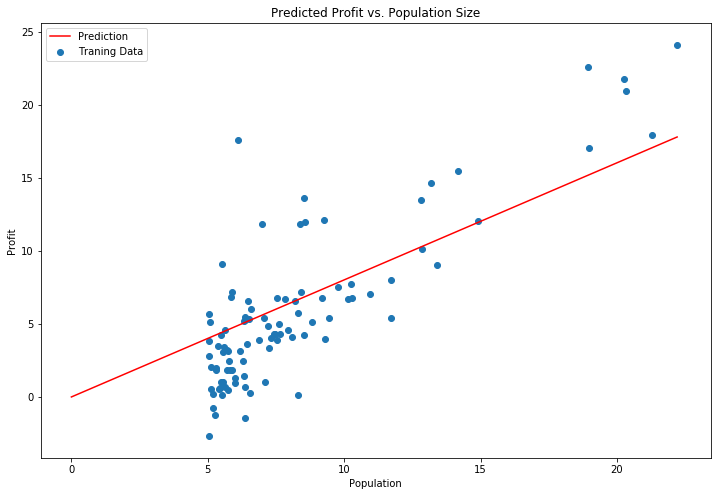

In [19]:
x = np.linspace(0, data.Population.max(), 100)#Êõ¥Êîπx‰ªé0ÂºÄÂßã
f = g[0,0] * x#Âè™Êúâ‰∏Ä‰∏™thetaÔºåÊïÖÊ≠§Â§ÑÂáΩÊï∞Â∫îËØ•ËøáÂéüÁÇπ

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()
#ÂéüÂõæÂÉè‰∏çËøáÂéüÁÇπÔºåÁé∞Âú®ËøáÂéüÁÇπÔºå

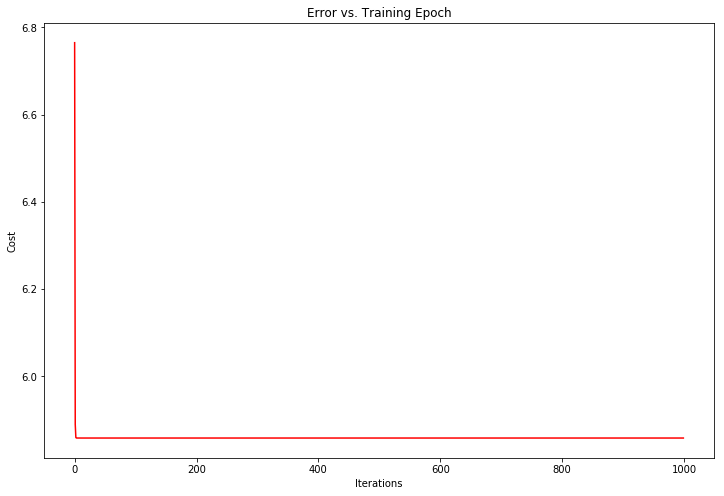

In [20]:
#ËæìÂá∫cost‰∏ãÈôçÁöÑËøáÁ®ã
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()
#‰∏§‰∏™Â§áÈÄâÂÄºœâÂíåbÔºåÈúÄË¶ÅÂ§ßÈáèËø≠‰ª£ÊâçËÉΩÊâæÂá∫Áõ∏ÂØπ‰ºòÁöÑËß£„ÄÇÂΩìÂè™Êúâ‰∏Ä‰∏™œâÊó∂ÔºåÂá†ÂçÅÊ¨°Â∞±ËÉΩÊâæÂá∫ÊúÄ‰ºòÔºåÊâÄ‰ª•‰∏ãÈôçÈùûÂ∏∏Âø´ÔºÅÔºÅÔºÅÔºÅÔºÅ

In [21]:
cost

array([6.7651737 , 5.8900045 , 5.85973998, 5.85869339, 5.8586572 ,
       5.85865595, 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.85865

In [22]:
cost.shape

(1000,)

In [23]:
#ÂèñcostÂâç20È°π
cost=cost[0:12]
#ÂèñitersÂâç20È°π
iters=12

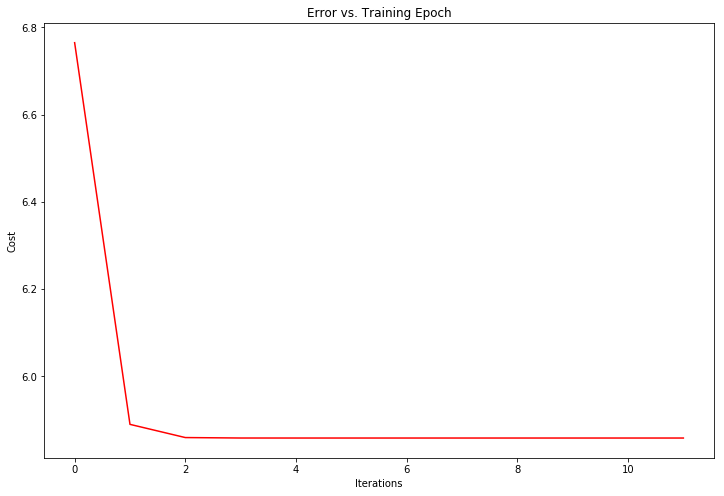

In [24]:
#Êàë‰ª¨ÂÜçÊù•ÁúãÁúãcostÂú®Ëø≠‰ª£‰∏≠ÁöÑÂèòÂåñÔºåÁúãÁúã‰∏ãÈôçÁöÑËøáÁ®ã

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [25]:
#‰∏§Ê¨°Â∞±Âá†‰πéÊâæÂà∞‰∫ÜÊúÄÂ∞èOmegaÔºÅ
#üêÇ